### Reconhecimento de alfabeto de sinais

Utiliza CNN pra reconhecer síbolo do alfabeto americano de sinais. 
O presente notebook organiza os testes realizados anteriormente e treina o modelo com um maior número de épocas

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


Bad key "text.kerning_factor" on line 4 in
C:\Users\Jefferson\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
# raliza o preprocessamento das images com o ImageDataGenerator do Keras
# Neste teste simpes, não iremos testar os parâmetros do preprocessamento

datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.25 # divide o dataset em treino e validação
)

training_set = datagen.flow_from_directory(
    '../Data/asl_alphabet_train/asl_alphabet_train', 
    target_size = (64,64), 
    batch_size=32, 
    subset= 'training',
    class_mode = 'categorical')

Found 65250 images belonging to 29 classes.


In [6]:
# cria o dataset de validação
test_set = datagen.flow_from_directory(
    '../Data/asl_alphabet_train/asl_alphabet_train',
        target_size=(64, 64),
        batch_size=32,
        subset= 'validation',
        class_mode = 'categorical')

Found 21750 images belonging to 29 classes.


In [7]:
# Cria modelo de CNN
def cnn_sinais():
    # inicializa o modelo
    cnn = tf.keras.models.Sequential()
    # adiciona camada de convolução
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation='relu', input_shape = [64,64,3]))
    # adiciona pooling
    cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))
    # adiciona segunda camada de convolução
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size = 3, activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))
    # adiciona flattening
    cnn.add(tf.keras.layers.Flatten())
    # adiociona camada de full connection
    cnn.add(tf.keras.layers.Dense(units = 1024, activation='relu'))
    # adiciona camada de saída
    cnn.add(tf.keras.layers.Dense(units = 29, activation='softmax'))
    # compila o modelo
    cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return cnn

In [8]:
modelo = cnn_sinais().fit(x = training_set, validation_data= test_set, epochs=25)

Epoch 1/25
2040/2040 [==============================] - 595s 292ms/step - loss: 1.5039 - accuracy: 0.5595 - val_loss: 1.8300 - val_accuracy: 0.5267
Epoch 2/25
2040/2040 [==============================] - 612s 300ms/step - loss: 0.1308 - accuracy: 0.9574 - val_loss: 2.3746 - val_accuracy: 0.5701
Epoch 3/25
2040/2040 [==============================] - 596s 292ms/step - loss: 0.0769 - accuracy: 0.9745 - val_loss: 2.0783 - val_accuracy: 0.6186
Epoch 4/25
2040/2040 [==============================] - 666s 326ms/step - loss: 0.0551 - accuracy: 0.9837 - val_loss: 2.2055 - val_accuracy: 0.6183
Epoch 5/25
2040/2040 [==============================] - 587s 288ms/step - loss: 0.0335 - accuracy: 0.9899 - val_loss: 2.8586 - val_accuracy: 0.5903
Epoch 6/25
2040/2040 [==============================] - 555s 272ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 2.2349 - val_accuracy: 0.6054
Epoch 7/25
2040/2040 [==============================] - 520s 255ms/step - loss: 0.0251 - accuracy: 0.9922 - val_

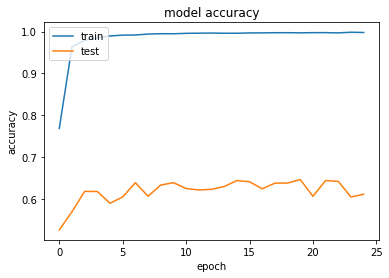

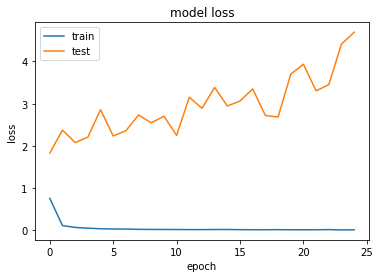

In [9]:
# summarize history for accuracy
plt.plot(modelo.history['accuracy'])
plt.plot(modelo.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(modelo.history['loss'])
plt.plot(modelo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# fazer predições
path = '../Data/asl_alphabet_test/asl_alphabet_test/A_test.jpg'

test_image = image.load_img(path, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices

saida = np.where(result == 1)


for letra, i in training_set.class_indices.items():
    if saida[1][0] == i:
        prediction = letra

show = image.load_img(path)
plt.imshow(show)

print('Acho que é um '+ prediction+ '.')